In [1]:
import pickle
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [3]:
prec_total = pickle.load(open('precion.pkl', 'rb'))
recall_total = pickle.load(open('recall.pkl', 'rb'))
spec_total = pickle.load(open('specificity.pkl', 'rb'))
titles_total = pickle.load(open('titles.pkl', 'rb'))
model_list = pickle.load(open('models.pkl', 'rb'))
auc_list = pickle.load(open('aucs.pkl', 'rb'))
feature_headers = pickle.load(open('feature_headers.pkl', 'rb'))
girls_df = pickle.load(open('girls_df.pkl', 'rb'))
girls_lutheran_df = pickle.load(open('girls_lutheran_df.pkl', 'rb'))
boys_df = pickle.load(open('boys_df.pkl', 'rb'))
boys_lutheran_df = pickle.load(open('boys_lutheran_df.pkl', 'rb'))

ROC curve:


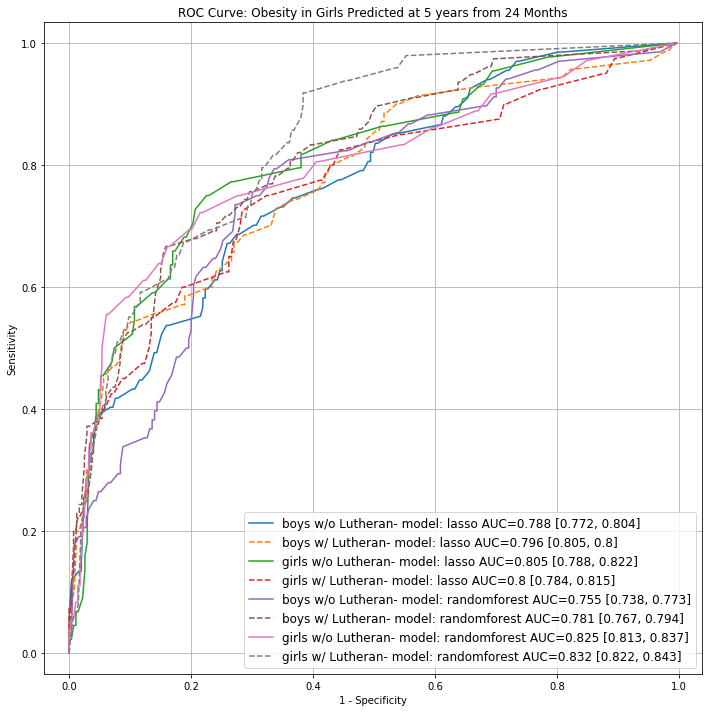

In [4]:
print('ROC curve:')

plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    lab = auc_list[ix][0]+' AUC='+str(auc_list[ix][1])+' ['+str(auc_list[ix][2])+', '+str(auc_list[ix][3])+']'

    if 'w/ Lutheran' in auc_list[ix][0]:
        plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='--', label=lab)
    else:
        plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='-', label=lab)
    
plt.legend(fontsize = 12, )
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis('equal')
plt.title('ROC Curve: Obesity in Girls Predicted at 5 years from 24 Months')
plt.grid(True);
plt.tight_layout()
plt.savefig('Pediatric_ROC.png', dpi=300)
plt.show()

ROC curve:


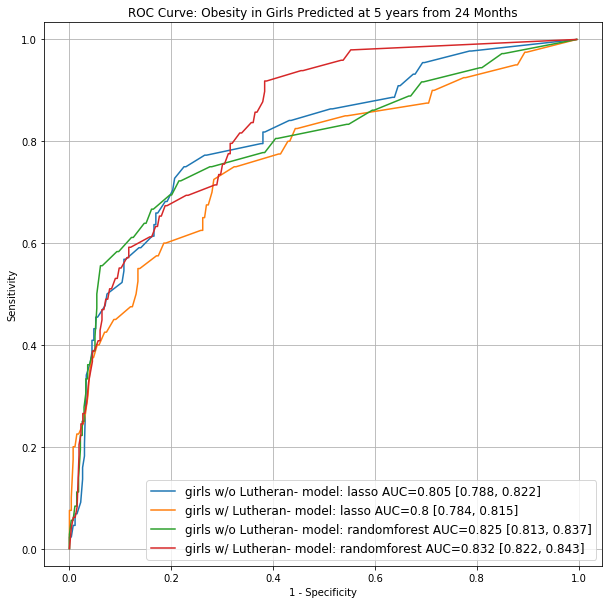

In [5]:
print('ROC curve:')

plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    lab = auc_list[ix][0]+' AUC='+str(auc_list[ix][1])+' ['+str(auc_list[ix][2])+', '+str(auc_list[ix][3])+']'
    if 'girls' in auc_list[ix][0]:
        plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), label=lab)

#     if 'w/ Lutheran' in auc_list[ix][0]:
#         plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='--', label=lab)
#     else:
#         plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='-', label=lab)
    
plt.legend(fontsize = 12, )
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis('equal')
plt.title('ROC Curve: Obesity in Girls Predicted at 5 years from 24 Months')
plt.grid(True);
plt.savefig('Pediatric_Girls_ROC.png', dpi=300)
plt.show()

ROC curve:


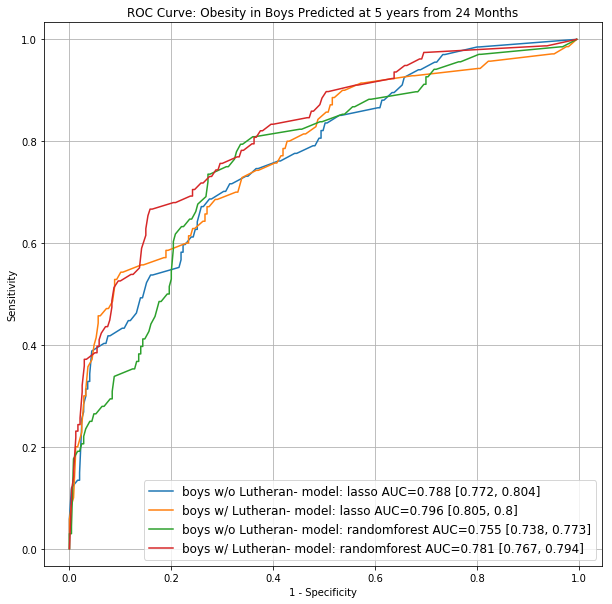

In [6]:
print('ROC curve:')

plt.figure(figsize=(10,10))
for ix in range(len(prec_total)):
    lab = auc_list[ix][0]+' AUC='+str(auc_list[ix][1])+' ['+str(auc_list[ix][2])+', '+str(auc_list[ix][3])+']'
    if 'girls' in auc_list[ix][0]:
        continue
#     if 'w/ Lutheran' in auc_list[ix][0]:
#         plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='--', label=lab)
#     else:
#         plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linestyle='-', label=lab)

    plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), label=lab)
    
plt.legend(fontsize = 12, )
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis('equal')
plt.title('ROC Curve: Obesity in Boys Predicted at 5 years from 24 Months')
plt.grid(True);
plt.savefig('Pediatric_Boys_ROC.png', dpi=300)
plt.show()

In [7]:
for name, auc, lower, upper in auc_list:
    print(name, ' = ', auc, ' - ', upper-lower)

boys w/o Lutheran- model: lasso  =  0.788  -  0.03200000000000003
boys w/ Lutheran- model: lasso  =  0.796  -  -0.0050000000000000044
girls w/o Lutheran- model: lasso  =  0.805  -  0.03399999999999992
girls w/ Lutheran- model: lasso  =  0.8  -  0.030999999999999917
boys w/o Lutheran- model: randomforest  =  0.755  -  0.03500000000000003
boys w/ Lutheran- model: randomforest  =  0.781  -  0.027000000000000024
girls w/o Lutheran- model: randomforest  =  0.825  -  0.02400000000000002
girls w/ Lutheran- model: randomforest  =  0.832  -  0.02100000000000002


In [8]:
features = np.zeros((model_list[0].coef_.shape[0], len(model_list)))
for ix, model in enumerate(model_list):
    try:
        weights = model.coef_
    except:
        weights = model.feature_importances_
    features[:,ix] = np.array(weights.ravel())
    
    
df = pd.DataFrame(features, columns=[x[0] for x in auc_list])
df.insert(loc=0, column='features', value=feature_headers)
df.head()

,features,boys w/o Lutheran- model: lasso,boys w/ Lutheran- model: lasso,girls w/o Lutheran- model: lasso,girls w/ Lutheran- model: lasso,boys w/o Lutheran- model: randomforest,boys w/ Lutheran- model: randomforest,girls w/o Lutheran- model: randomforest,girls w/ Lutheran- model: randomforest
0,Diagnosis:9ccsCCS CATEGORY:CCS CATEGORY DESCRI...,0.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
1,Diagnosis:9ccs0:No DX,0.144714,0.072542,-0.0,0.0,0.000744,2.397274e-04,0.000188,8.849547e-05
2,Diagnosis:9ccs1:Tuberculosis,0.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
3,Diagnosis:9ccs2:Septicemia,-0.000000,-0.000000,0.0,0.0,0.000002,5.292087e-08,0.000005,6.506510e-07
4,Diagnosis:9ccs3:Oth bact inf,-0.000000,0.000000,0.0,0.0,0.000307,1.745539e-04,0.004458,5.685527e-04


In [107]:
df.to_csv('feaure_importances.csv', sep=',', index=False)